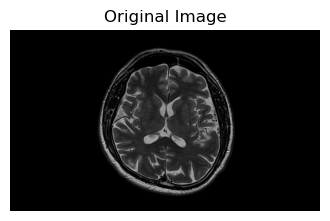

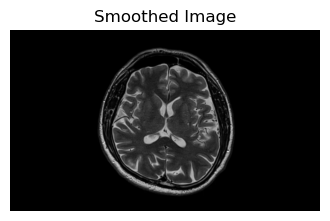

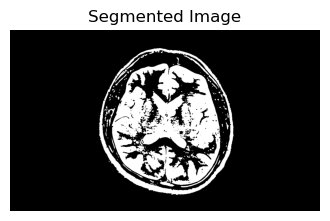

Extracted Features:
Area: 119254.0
Perimeter: 13180.25
Mean Intensity: 0.294


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, filters, color, measure
from skimage.util import img_as_float

# Load image
image = io.imread(r"C:\Users\sonka\Downloads\slicei.webp")
image = img_as_float(image)

# Convert to grayscale if RGB
if image.ndim == 3:
    gray_image = color.rgb2gray(image)
else:
    gray_image = image

# Display original image
plt.figure(figsize=(4,4))
plt.imshow(gray_image, cmap='gray')
plt.title("Original Image")
plt.axis("off")
plt.show()

# Preprocessing
smoothed_image = filters.gaussian(gray_image, sigma=1)

# Display smoothed image
plt.figure(figsize=(4,4))
plt.imshow(smoothed_image, cmap='gray')
plt.title("Smoothed Image")
plt.axis("off")
plt.show()

# Thresholding
threshold_value = filters.threshold_otsu(smoothed_image)
binary_image = smoothed_image > threshold_value

# Display segmented image
plt.figure(figsize=(4,4))
plt.imshow(binary_image, cmap='gray')
plt.title("Segmented Image")
plt.axis("off")
plt.show()

# Feature extraction
labels = measure.label(binary_image)
regions = measure.regionprops(labels, intensity_image=gray_image)

if len(regions) == 0:
    print("No regions detected. Try changing preprocessing parameters.")
else:
    largest_region = max(regions, key=lambda r: r.area)

    area = largest_region.area
    perimeter = largest_region.perimeter
    mean_intensity = largest_region.mean_intensity

    print("Extracted Features:")
    print(f"Area: {area}")
    print(f"Perimeter: {perimeter:.2f}")
    print(f"Mean Intensity: {mean_intensity:.3f}")
